EULER SCHEME: GEOMETRIC WIENER PROCESS

Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Set random seed

In [144]:
np.random.seed(1)

Set main variables

In [61]:
S0 = 12 # initial price
r = 0.02 # risk-free rate
v = 0.3 # volatility
T = 0.65 # maturity
M = 365 # number of time steps
rd = np.exp(-r*T) # riskless discount factor
dt = T/(M-1) # time step

Defining Euler scheme function

In [176]:
def euler(S0, r, v, T, M):
    dt = T/(M-1)
    u = np.random.normal(size=M+1)
    Z = [S0]
    for m in range(1,M):
        Z.append(Z[m-1]+r*Z[m-1]*dt+v*Z[m-1]*np.sqrt(dt)*u[m+1])
    return Z

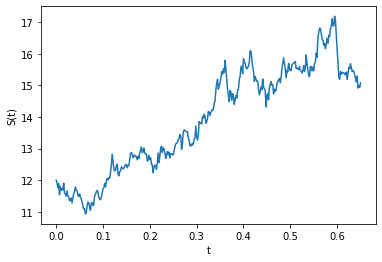

In [68]:
t = np.arange(0, T+dt, dt) # time grid
plt.plot(t, euler(S0, r,v,T,M,1))
plt.xlabel('t')
plt.ylabel('S(t)')
plt.show()

MONTECARLO SIMULATION WITH EULER SCHEME FOR PRICING OF AN EUROPEAN PUT OPTION

Variables

In [175]:
s0 = 12
r = 0.02
v = 0.3
T = 0.65
M = 100
N = 50000
K = 13
rd = np.exp(-r*T) # riskless discount factor


In [177]:
def monte_carlo(S0, r, v, T, M, N):
    expected_value = 0
    payoffs= []
    for i in range(N):
        Z = euler(S0, r, v, T, M)
        payoff = (rd*max(0,K-Z[-1]))
        expected_value += payoff
        payoffs.append(payoff)
    P0 = round(expected_value/N,4)
    pSE = round(np.std(payoffs)/np.sqrt(N),4)
    pUCI = round(P0 + 1.96*pSE,4)
    pLCI = round(P0 - 1.96*pSE,4)

    return P0, pSE, pUCI, pLCI 

In [178]:
monte_carlo(S0, r, v, T, M, N)

(1.669, 0.0079, 1.6845, 1.6535)

In [160]:
pv,stardard_eror,upper_CI, lower_CI =monte_carlo(S0, r, v, T, M, N)

print('The price of the option is: ', pv, 'with a standard error of: ', stardard_eror, 'and a 95% confidence interval of: ', lower_CI, 'to', upper_CI)

The price of the option is:  1.6185 with a standard error of:  0.0175 and a 95% confidence interval of:  1.5842 to 1.6528
